In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

In [20]:
bitcoin = pd.read_csv('pricing_data/Cryptocurrency.csv')
bitcoin['Date'] = bitcoin['Date'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%y'))
bitcoin = bitcoin[bitcoin['Volume'] != '-']
bitcoin['Volume'] = bitcoin['Volume'].apply(lambda x: float(x.replace(',', '')) / 1e10)
bitcoin['Market Cap'] = bitcoin['Market Cap'].apply(lambda x: float(x.replace(',', '')) / 1e11)
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2019-04-27,"5,279.47","5,310.75","5,233.64","5,268.29",1.311127,0.930862
1,2019-04-26,"5,210.30","5,383.63","5,177.37","5,279.35",1.681211,0.932723
2,2019-04-25,"5,466.52","5,542.24","5,181.34","5,210.52",1.533028,0.920465
3,2019-04-24,"5,571.51","5,642.04","5,418.26","5,464.87",1.704803,0.965300
4,2019-04-23,"5,399.37","5,633.80","5,389.41","5,572.36",1.586731,0.984174


In [39]:
def annot_max(x,y, ax=None):
#     xmax = x[np.argmax(y)]
    ymax = y.max()
    xmax = x[y.index(ymax)]
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

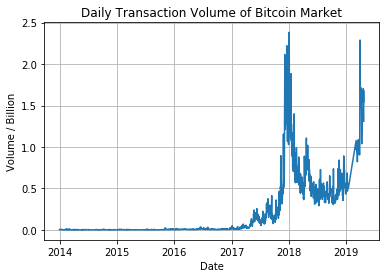

In [41]:
fig, ax = plt.subplots()
plt.plot('Date', 'Volume', label='Volume', data=bitcoin)
# plt.plot('Date', 'Market Cap', label='Market Cap', data=bitcoin)
plt.xlabel('Date')
plt.ylabel('Volume / Billion')
plt.grid()
plt.title('Daily Transaction Volume of Bitcoin Market')
plt.show()
fig.savefig('bitcoin_volume.png', dpi=300)

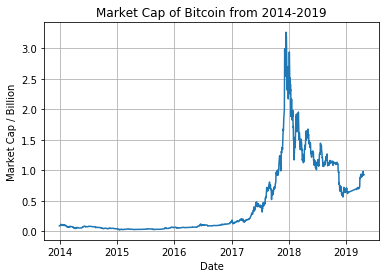

In [44]:
fig, ax = plt.subplots()
plt.plot('Date', 'Market Cap', label='Market Cap', data=bitcoin)
plt.xlabel('Date')
plt.ylabel('Market Cap / Billion')
plt.grid()
plt.title('Market Cap of Bitcoin from 2014-2019')
plt.show()
fig.savefig('bitcoin_market_cap.png', dpi=300)

In [4]:
# Plot the count of 'Bitcoin' and the pricing of 'Bitcoin' market
daily_bitcoin_pricing = pd.read_csv('bitcoin-24hv0.csv')
daily_bitcoin_pricing['Pricing'] = daily_bitcoin_pricing['Series 1']
daily_bitcoin_pricing = daily_bitcoin_pricing.drop(['Series 1'], axis=1)
print(daily_bitcoin_pricing.head())
# count of bitcoin occurrances in medias
daily_bitcoin_count = pd.read_csv('tmp/daily_bitcoin_count.csv')
daily_bitcoin_count.head()

              DateTime  Pricing
0  2013-04-28 00:00:00   135.30
1  2013-04-29 00:00:00   134.44
2  2013-04-30 00:00:00   144.00
3  2013-05-01 00:00:00   139.00
4  2013-05-02 00:00:00   116.38


,count,date
0,1,2013-01-01 00:00:00
1,6,2013-01-02 00:00:00
2,8,2013-01-03 00:00:00
3,5,2013-01-04 00:00:00
4,4,2013-01-05 00:00:00


In [39]:
# daily_bitcoin_pricing_2014_2015 = daily_bitcoin_pricing[(daily_bitcoin_pricing['DateTime'] >= '2014-01-01 00:00:00') & (daily_bitcoin_pricing['DateTime'] < '2016-01-01 00:00:00')]
# daily_bitcoin_count_2014_2015 = daily_bitcoin_count[(daily_bitcoin_count['date'] >= '2014-01-01 00:00:00') & (daily_bitcoin_count['date'] < '2016-01-01 00:00:00')]
# print(daily_bitcoin_pricing_2014_2015.head())
# print("len of 2014_2015 bitcoin pricing is {}".format(len(daily_bitcoin_pricing_2014_2015['DateTime'])))
# print("len of 2014_2015 bitcoin count is {}".format(len(daily_bitcoin_count_2014_2015['date'])))
daily_bitcoin_pricing_count = pd.merge(daily_bitcoin_pricing, daily_bitcoin_count, 
                                       how='inner', left_on='DateTime', right_on='date').drop(['date'], axis=1)
daily_bitcoin_pricing_count['DateTime'] = [x[:10] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['day'] = [x[8:10] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['month'] = [x[5:7] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['year'] = [x[0:4] for x in daily_bitcoin_pricing_count['DateTime']]
daily_bitcoin_pricing_count['DateTime'] = pd.to_datetime(daily_bitcoin_pricing_count['DateTime'])
print(daily_bitcoin_pricing_count.head())
daily_bitcoin_pricing_count.describe()
daily_bitcoin_pricing_count.dtypes

    DateTime  Pricing  count day month  year
0 2013-04-28   135.30     18  28    04  2013
1 2013-04-29   134.44     46  29    04  2013
2 2013-04-30   144.00     29  30    04  2013
3 2013-05-01   139.00     45  01    05  2013
4 2013-05-02   116.38     90  02    05  2013


DateTime    datetime64[ns]
Pricing            float64
count                int64
day                 object
month               object
year                object
dtype: object

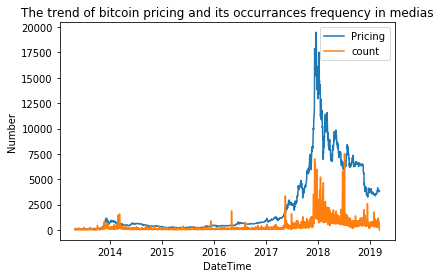

In [75]:
# daily_bitcoin_pricing_count01 = daily_bitcoin_pricing_count[daily_bitcoin_pricing_count['day'] == '01']
# fig, ax = plt.subplots()
# fg = sns.lineplot(x='DateTime', y='Pricing', data=daily_bitcoin_pricing_count01, ax=ax)
# fig.autofmt_xdate()
# daily_bitcoin_pricing_count.plot(x='DateTime', y='Pricing')
# daily_bitcoin_pricing_count.plot(x='DateTime', y='count')
fig, ax = plt.subplots()
plt.plot('DateTime', 'Pricing', label='Pricing', data=daily_bitcoin_pricing_count)
plt.plot('DateTime', 'count', label='count', data=daily_bitcoin_pricing_count)
plt.xlabel('DateTime')
plt.ylabel('Number')
plt.title('The trend of bitcoin pricing and \n its occurrances frequency in medias')
plt.legend()
plt.show()
fig.savefig('Bitcoin_Price_And_Occurencies.png', dpi=300)

# Normalization

/Users/dahang/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/dahang/anaconda3/envs/cs418env/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


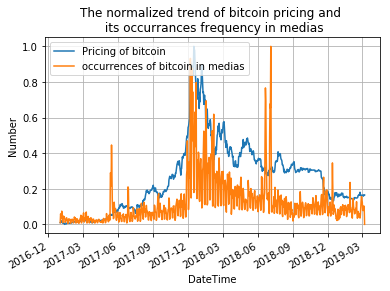

In [77]:
# Normalized Plotting
from matplotlib import dates as mdates
df = daily_bitcoin_pricing_count.copy()
daily_bitcoin_pricing_count_norm = df[df['DateTime'] >= '2017-01-01']

pricing_series = daily_bitcoin_pricing_count_norm['Pricing'];
min_price = min(pricing_series)
max_price = max(pricing_series)

count_series = daily_bitcoin_pricing_count_norm['count'];
min_count = min(count_series)
max_count = max(count_series)

fig, ax = plt.subplots()
daily_bitcoin_pricing_count_norm['Pricing'] = [(x - min_price) / (max_price - min_price) 
                                               for x in pricing_series if max_price != min_price]
daily_bitcoin_pricing_count_norm['count'] = [(x - min_count) / (max_count - min_count) 
                                               for x in count_series if max_count != min_count]
ax.plot('DateTime', 'Pricing', label='Pricing of bitcoin', data=daily_bitcoin_pricing_count_norm)
ax.plot('DateTime', 'count', label='occurrences of bitcoin in medias', data=daily_bitcoin_pricing_count_norm)
plt.xlabel('DateTime')
plt.ylabel('Number')
plt.title('The normalized trend of bitcoin pricing and \n its occurrances frequency in medias')
plt.legend()

# format the ticks
ax.xaxis.set_major_locator(mdates.MonthLocator(None, 1, 3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.grid(True)
fig.autofmt_xdate()
plt.show()
fig.savefig('Bitcoin_Price_And_Occurencies_Normalized.png', dpi=300)